# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Os dados são criados a seguir:

In [2]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




A hipótese alternativa (H1) define que a média da Estratégia B é maior que a da Estratégia A. Isso significa que estamos interessados na região à direita da distribuição, onde os valores são maiores.

Um teste unilateral à esquerda seria apropriado se a hipótese alternativa fosse: "A média das notas na Estratégia B é menor do que a média das notas na Estratégia A".

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [3]:
media_amostra_a = np.mean(amostra_estrategia_A)
variancia_amostra_a = np.var(amostra_estrategia_A)

media_amostra_b = np.mean(amostra_estrategia_B)
variancia_amostra_b = np.var(amostra_estrategia_B)

print("Média da amostra A:", media_amostra_a)
print("Variância da amostra A:", variancia_amostra_a)
print("Média da amostra B:", media_amostra_b)
print("Variância da amostra B:", variancia_amostra_b)

Média da amostra A: 71.40559272313098
Variância da amostra A: 126.68018446943104
Média da amostra B: 74.74868110507046
Variância da amostra B: 108.26062024217782


# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [4]:
z_stat = (media_amostra_b - media_amostra_a) / np.sqrt((variancia_amostra_b / len(amostra_estrategia_B)) + (variancia_amostra_a / len(amostra_estrategia_A)))
print("Estatística Z:", z_stat)

Estatística Z: 1.542245935902539


In [5]:
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("p-value do grupo A:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa entre as médias das notas dos alunos nas duas estratégias.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para concluir que as médias das notas dos alunos nas duas estratégias são diferentes.")

p-value do grupo A: 0.12301384127809167
Não rejeitamos a hipótese nula. Não há evidência suficiente para concluir que as médias das notas dos alunos nas duas estratégias são diferentes.


# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

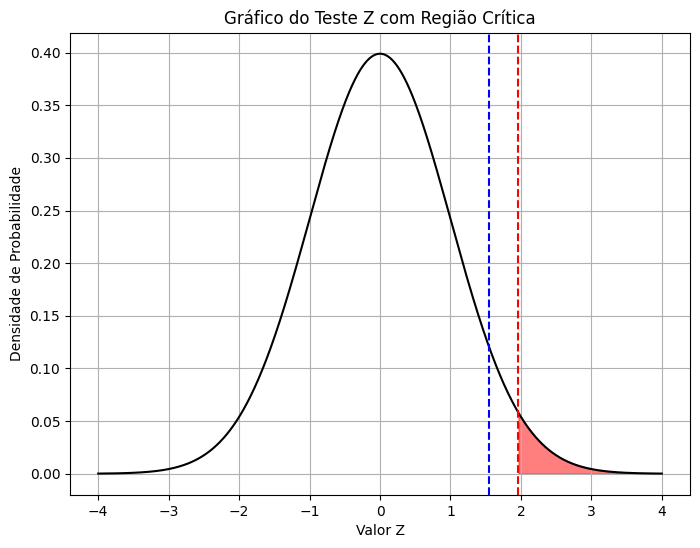

In [10]:
# Parâmetros do teste Z
media = 0  # Média da distribuição normal padrão (Z)
desvio_padrao = 1  # Desvio padrão da distribuição normal padrão (Z)
nivel_de_significancia = 0.05  # Nível de significância (alfa)

# Calcular os valores críticos para um teste unilateral a direita
valor_critico = stats.norm.ppf(1 - nivel_de_significancia / 2, loc=media, scale=desvio_padrao)

# Gerar valores para o eixo x
x = np.linspace(media - 4 * desvio_padrao, media + 4 * desvio_padrao, 1000)

# Calcular os valores da função de densidade de probabilidade (PDF)
pdf = stats.norm.pdf(x, loc=media, scale=desvio_padrao)

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color='black')  # Curva da distribuição normal padrão

# Preencher a região crítica
plt.fill_between(x, pdf, where= (x > valor_critico), color='red', alpha=0.5)

# Adicionar linhas verticais para os valores críticos
plt.axvline(x=valor_critico, color='red', linestyle='--')
plt.axvline(x=z_stat, color='blue', linestyle='--', label='p-valor')

# Configurar o gráfico
plt.title('Gráfico do Teste Z com Região Crítica')
plt.xlabel('Valor Z')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)

# Exibir o gráfico
plt.show()

Note que nosso teste não nos permitiu rejeitar a hipótese nula, pois o p-value era superior ao nível de significância. Deste modo, temos que o valor do teste Z é externo a zona crítica do gráfico da função de probabilidade, o que ilustra o fato de não termos evidências o suficiente para rejeitar a hipótese nula.